In [20]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
training_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True, 
    transform = ToTensor(),
)
test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True, 
    transform = ToTensor(),
)


11.7%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

29.3%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

47.2%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

64.9%IOPub

Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100.6%


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



42.7%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100.0%


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



119.3%


Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw

Processing...


D:\anaconda\envs\pytorch\lib\site-packages\torchvision\datasets\mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [16]:
batch_size = 64

train_dl = DataLoader(training_data, batch_size=batch_size)
test_dl = DataLoader(test_data, batch_size=batch_size)

In [18]:
from torchvision.utils import make_grid

64


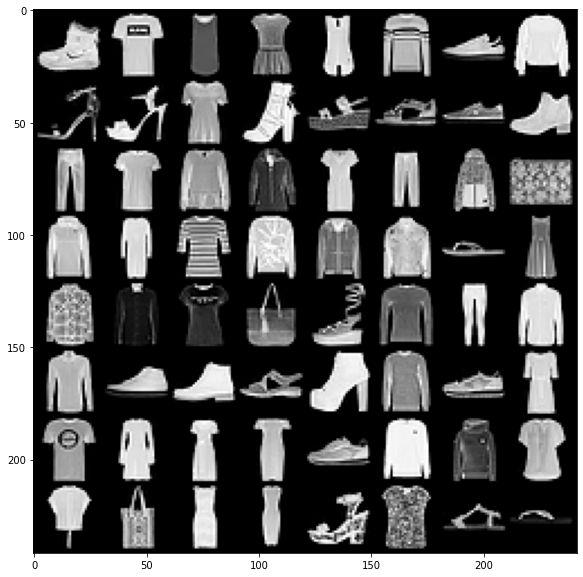

In [35]:
for image, label in train_dl:
#     print(image)
    plt.figure(figsize = (10, 10))
    plt.imshow(make_grid(image, nrow=8).permute(1, 2, 0))
#     print(label)
    print(len(image))
    break

In [26]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} Device')

Using cuda Device


In [29]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 10),
            nn.ReLU()
        )
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [27]:
(28*28 + 2 - 3) / 1

783.0

In [30]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=10, bias=True)
    (5): ReLU()
  )
)


In [60]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (image, label) in enumerate(dataloader):
        image, label = image.to(device), label.to(device)
        
        pred = model(image)
        loss = loss_fn(pred, label)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(image)
            print(f"loss : {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [64]:
def test(dataloader, model, loss):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for image, label in dataloader:
            image, label = image.to(device), label.to(device)
            pred = model(image)
            test_loss += loss(pred, label).item()
            correct += (pred.argmax(1) == label).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [65]:
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)

In [68]:
epochs = 10
for epoch in range(epochs):
    print(f"Epoch {epoch+1}\n" , "="*40)
    train(train_dl, model, loss, optimizer)
    test(test_dl, model, loss)
print('DONE')

Epoch 1
loss : 0.110402  [    0/60000]
loss : 0.137222  [ 6400/60000]
loss : 0.193706  [12800/60000]
loss : 0.185433  [19200/60000]
loss : 0.221704  [25600/60000]
loss : 0.233081  [32000/60000]
loss : 0.168370  [38400/60000]
loss : 0.253265  [44800/60000]
loss : 0.192406  [51200/60000]
loss : 0.231102  [57600/60000]
Test Error: 
 Accuracy: 88.1%, Avg loss: 0.373505 

Epoch 2
loss : 0.122304  [    0/60000]
loss : 0.150564  [ 6400/60000]
loss : 0.163887  [12800/60000]
loss : 0.173045  [19200/60000]
loss : 0.277499  [25600/60000]
loss : 0.216307  [32000/60000]
loss : 0.207402  [38400/60000]
loss : 0.287585  [44800/60000]
loss : 0.219904  [51200/60000]
loss : 0.205302  [57600/60000]
Test Error: 
 Accuracy: 87.9%, Avg loss: 0.391130 

Epoch 3
loss : 0.131829  [    0/60000]
loss : 0.177408  [ 6400/60000]
loss : 0.173626  [12800/60000]
loss : 0.228234  [19200/60000]
loss : 0.233861  [25600/60000]
loss : 0.241646  [32000/60000]
loss : 0.170433  [38400/60000]
loss : 0.177181  [44800/60000]
loss

In [67]:
torch.save(model.state_dict(), 'model.pth')
print('Saved')

Saved


In [ ]:
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)